## 목표: 생선 품종 분류 모델
- 데이터 : fish.csv
- 피쳐 : Weight, Height
- 타깃 : Species
- 기계학습 : 지도학습 + 분류 (도미, 빙어 분류는 이진분류)

## 모듈 로딩하기 <hr>

In [105]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# 인텔제공 최적화 라이브레리

from sklearnex import patch_sklearn ,unpatch_sklearn
patch_sklearn()
# unpatch_sklearn()
# 패치후 로딩
import sklearn

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [117]:
X = np.array([[1,  2], [1,  4], [1,  0],
              [10, 2], [10, 4], [10, 0]]
             )
kmeans = sklearn.cluster.KMeans(
    n_clusters=2, 
    random_state=0, 
    # n_init='auto',
).fit(X)
print(f"kmeans.labels_ = {kmeans.labels_}")
# kmeans:sklearn.cluster.KMeans



kmeans.labels_ = [1 1 1 0 0 0]


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\daal4py\sklearn\cluster\_k_means_0_23.py:184: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 데이터 준비

In [3]:
df = pd.read_csv('../data/fish.csv', usecols=['Species', 'Weight', 'Length'])

df['Species'] = df['Species'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  159 non-null    category
 1   Weight   159 non-null    float64 
 2   Length   159 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.1 KB


## 데이터 전처리


In [4]:
# 컬럼별 고유값으로 이상치 체크 => unique()
df.Species.unique()

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
Categories (7, object): ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [6]:
# 중복데이터 체크
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [7]:
twoFishDf = df[df['Species'].isin(['Bream', 'Smelt'])]


In [8]:
twoFishDf
twoFishDf.reset_index(inplace = True, drop=True)

## 학습용 데이터 준비 => 피쳐 + 타켓으로 분리

In [9]:
feature = twoFishDf[twoFishDf.columns[1:]]


In [10]:
# 타켓데이터 추출
target = twoFishDf.Species

# change category to number
targetcode = target.cat.codes
targetcode.unique()


array([0, 5], dtype=int8)

## 학습을 진행
- 알고리즘 구현 인스턴스 생성 => 지도학습 - 분류 알고리즘 중 선택 (KNN)
- 학습 진행 메서드 => fit()

In [11]:
# KNN 인스턴스 생성
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)
knn


KNeighborsClassifier(n_jobs=-1)

In [12]:
# KNN 학습 진행
# 차원을 맞춰주어야 함
# KNN에서 feature는 2차원, targetcode 는 1차원
knn.fit(feature, targetcode)

KNeighborsClassifier(n_jobs=-1)

In [13]:
#KNN 학습 후 속성값
print(knn.classes_)
print(knn.feature_names_in_)
print(knn.n_features_in_)


[0 5]
['Weight' 'Length']
2


## 학습 후 검사 즉 테스트 => 메서드 : score
- 결과 값 : 0.0 ~ 1.0 (100%)
- 사용데이터 : 학습에 사용되지 않는 데이터

In [14]:
knn.score(feature, targetcode)

1.0

## 예측 즉 서비스에 모델 활용 시 사용 => 메서드 : predict()
- 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달

In [15]:
import numpy as np
new_data = pd.DataFrame([[800.8, 40]], columns=['Weight', 'Length'])


# [무게, 길이]
# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = knn.predict(new_data)
pred_y


array([0], dtype=int8)

In [16]:

knn.predict_proba(new_data)

array([[1., 0.]])

### getter/setter 메서드
=> 속성값 설정 => setter메서드 set_속성명
=> 속성값 읽기 => getter메서드 get_속성명

In [17]:
# 데이터와 최근접 이웃 데이터
knn.kneighbors(new_data)

(array([[ 49.36233382,  75.96472866,  80.95455515,  86.89211702,
         100.92393175]]),
 array([[26, 23, 24, 25, 22]], dtype=int64))

In [18]:
feature.index

RangeIndex(start=0, stop=47, step=1)

In [19]:
# 데이터와 최근접 이웃 데이터 찾기
# 반환값 : 거리, 원소번호
# inputdata = [20,500]
result = knn.kneighbors(new_data)
# result

print(knn.predict_proba(new_data), result)




[[1. 0.]] (array([[ 49.36233382,  75.96472866,  80.95455515,  86.89211702,
        100.92393175]]), array([[26, 23, 24, 25, 22]], dtype=int64))


In [20]:
list(result[1][0])

[26, 23, 24, 25, 22]

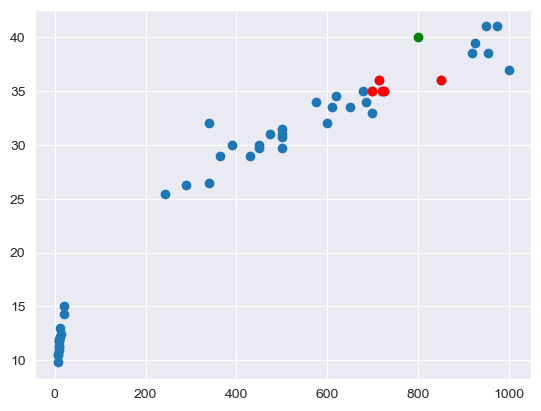

In [21]:
mask = twoFishDf.index.isin(result[1][0])

plt.scatter(
    y = twoFishDf['Length'],
    x = twoFishDf['Weight']
)
plt.plot(new_data['Weight'],new_data['Length'], 'go')
plt.plot(twoFishDf[mask]['Weight'], twoFishDf[mask]['Length'], 'ro')
plt.show()